<a href="https://colab.research.google.com/github/MaharshSuryawala/Face-Detection-and-Facial-Expression-Recognition/blob/master/FaceDetectionAndExpressionRecognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#import google.colab import drive
#drive.mount('/gdrive')

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ML')

try:
  os.makedirs(local_download_path)
except: pass


    100% |████████████████████████████████| 993kB 18.0MB/s 


In [0]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1SH6l2OnjiuzqQZyEawn7m3uYDl9gLtzo' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloadingz to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: 128_128.pkl, id: 1--8-VEeI08W845CNvYbxmA88Uoaqf2vr
downloadingz to /root/ML/128_128.pkl
title: final_data_jagani.pkl, id: 18na-r38yjFrPPcv30Z9yResDU5sZKDSo
downloadingz to /root/ML/final_data_jagani.pkl
title: final.pkl, id: 1XyCuyagmYQnaDjOtcz9tvUTSbBeWJBTm
downloadingz to /root/ML/final.pkl
title: dummy.pkl, id: 1OFNpLJpM35HITHh5SAByY1R30UHJL9Js
downloadingz to /root/ML/dummy.pkl


In [0]:
%cd /root/ML

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_pickle("final_data_jagani.pkl")

/root/ML


In [0]:
print(data.shape)

data = data[data['X'] != None]

print(data.shape)

(4300, 6)
(4300, 6)


In [0]:
data_nosketch = data[data['sketch'] == 0]
data_nosketch
data_nosketch.shape

(2140, 6)

In [0]:
def return_dataset(data, class_name):
    for index, row in data.iterrows():
        
        vec = data['X'][index]
        
      
        if index == 0:
            X = vec
            y = np.reshape(data[class_name][index], (1, 1))

        else:
            X = np.concatenate((X, vec), axis=1)
            y = np.concatenate((y, np.reshape(data[class_name][index], (1, 1))), axis=0)
            
    return X, y

In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.model_selection import train_test_split
import cv2

Using TensorFlow backend.


In [0]:
X = data['X']
y = data['expression']


def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded
  
encoded_y = encode(y)
print(encoded_y)



#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.1, random_state = 42)
print(y_train.shape)
print(X_train.shape)


Shape of data (BEFORE encode): (4300,)
Shape of data (AFTER  encode): (4300, 7)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(3870, 7)
(3870,)


In [0]:
index = 0

X_list = list(X_train)
y_list = list(y_train)

X_list_n = []
X_test_n = []

for example in X_list:
  index = index + 1
  try:
    if (example.shape != (48, 48, 3)):
      print(index)
  except:
    print(X_list[index - 1])
    print(index - 1)
    X_list.pop(index - 1)
    y_list.pop(index - 1)
    
for example in X_list:
  gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
  X_list_n.append(gray)

  
  
for example in list(X_test):
  gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
  X_test_n.append(gray)
    
    
print(len(X_list))
print(len(y_list))

X_t = np.stack(X_list_n, axis=0)
y_t = np.stack(y_list, axis=0)

X_tes = np.stack(list(X_test_n), axis=0)
y_tes = np.stack((y_test), axis=0)

X_t = np.reshape(X_t, (X_t.shape[0], X_t.shape[1], X_t.shape[2], 1))
X_tes = np.reshape(X_tes, (X_tes.shape[0], X_tes.shape[1], X_tes.shape[2], 1))

print(y_tes.shape)

3870
3870
(430, 7)


<class 'numpy.ndarray'> uint8 (303, 384)


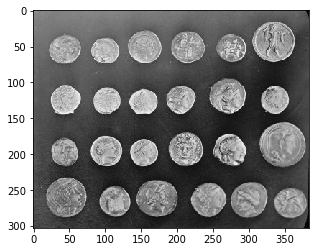

In [0]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');

(430, 7)
(430, 48, 48, 1)
-----------
<class 'numpy.ndarray'>
uint8
(48, 48)


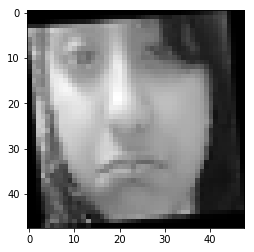

[0. 0. 0. 0. 0. 0. 1.]


In [0]:
print(y_tes.shape)
print(X_tes.shape)

print("-----------")

print(type(X_tes[0]))
print(X_tes[0].dtype)
print(X_tes[0].reshape((X_tes[0].shape[0], X_tes[0].shape[1])).shape)

plt.imshow(X_t[32].reshape((X_tes[0].shape[0], X_tes[0].shape[1])), cmap='gray')
plt.show()

print(y_t[32])

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json


from keras.optimizers import *
from keras.layers.normalization import BatchNormalization


model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#train the model
history = model.fit(X_t, y_t,
              batch_size=64,
              epochs=1,
              verbose=1,
              validation_split=0.1111)

Train on 3440 samples, validate on 430 samples
Epoch 1/1
3440/3440 [==============================] - 180s 52ms/step - loss: 0.4728 - categorical_accuracy: 0.1529 - val_loss: 0.4355 - val_categorical_accuracy: 0.1558


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []

predictions = model.predict(X_tes)

for i in predictions:
    pred_list.append(np.argmax(i))

for i in y_tes:
    actual_list.append(np.argmax(i))

confusion_matrix(actual_list, pred_list)

array([[18,  1,  1,  1, 27,  1,  0],
       [21,  1,  2,  5, 36,  3,  0],
       [14,  1,  5,  3, 36,  3,  0],
       [21,  1,  0,  2, 35,  0,  0],
       [19,  1,  2,  0, 48,  1,  0],
       [14,  0,  5,  5, 38,  5,  0],
       [15,  0,  3,  3, 27,  6,  0]])

In [0]:
predictions.shape

In [0]:
np.sum(np.sum(confusion_matrix(actual_list, pred_list), axis=1), axis=0)

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()